## Pair Programming - Regresión logística 2

### Procesado

---

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
from sklearn.preprocessing import StandardScaler

# Gestión datos desbalanceados
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

#  Configuración de warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../archivos/travel_1.csv', index_col=0)
df.head()

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commision_(in_value),gender,age,continent,cat_age,cat_duration
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81,Asia,retired,year
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71,Asia,retired,year
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,PNS,32,Oceania,adult youth,three months
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,PNS,32,Oceania,adult youth,three months
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,PNS,41,Europe,adult,three months


In [ ]:
# Borramos las columnas que no están categorizadas 

In [ ]:
#df.drop(["destination", "age", "duration"], inplace=True)

**Objetivos:**

### 1. Estandarizar las variables numéricas de vuestro set de datos.

In [ ]:
#Iniciamos el método 
#scaler = StandardScaler()

In [ ]:
#Seleccionamos las columnas numéricas que queremos estandarizar
#numericas = df.select_dtypes(include = np.number)
#numericas.head()

In [ ]:
# ahora ya podemos ajustar nuestros datos.  

#scaler.fit(numericas)

# transformamos los datos

#X_escaladas = scaler.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

#numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
#numericas_estandar.head(2)

In [ ]:
# dropeamos las columnas sin estandarizar

#df.drop(["age", "fare", "num_familiar"], axis = 1, inplace=True)
#df.head()

#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------------
# lanzo la propuesta de hacer dos modelos, tal vez en el mismo archivo, haciendo el encoding 
# con las columnas estandarizadas y con el encoding con las columnas sin estandarizar para 
# luego meter en el predict las dos opciones. 
# Podemos hacer dos archivos o añadir un sufijo en las columnas estandarizadas.

### 2. Codificar las variables categóricas. Tener en cuenta si las variables tienen orden o no.

- **Agency**: es de tipo object

- **Agency Type** : es de tipo object

- **Distribution Channel**: es de tipo object

- **Product Name**: es de tipo object

- **Claim Status**: Variable respuesta dicotómica de tipo object 

- **Duration**: es de tipo numérica

- **Destination**: es de tipo object

- **Net Sales**: es de tipo float

- **Commission**: es de tipo float

- **Gender**: es de tipo object

- **Age**: es de tipo numérica

### 2.1. Variables que no tienen orden.

### 2.2. Variables que tienen orden.

### 3. Chequear si los datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

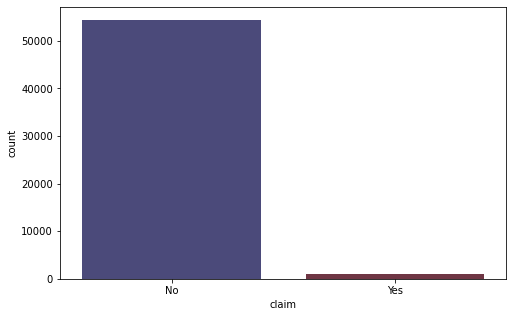

In [4]:
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "claim", palette = 'icefire')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [6]:
#Porcentajes variable respuesta
df["claim"].value_counts() / df.shape[0]

No     0.98334
Yes    0.01666
Name: claim, dtype: float64

### 3.1. Utilizamos el método SMOTE para balancear la variable respuesta.

In [7]:
# Separamos la variable respuesta de las predictoras
y = df['claim']
X = df.drop('claim', axis=1)

In [8]:
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

In [ ]:
y_train_res.value_counts()

In [ ]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

### 4. Guardad el dataframe.

In [ ]:
#df.to_csv('../archivos/travel_encoding.csv')